# VLE of glassy polymers

This is an example for a VLE calculation featuring a polymer and a solvent. PC-SAFT calculation for a water sorption isotherm of the polymer PVP were performed (the dotted line in Figure 2 of https://doi.org/10.3390/membranes12040434). 

In [1]:
import numpy as np
from diffusionpy import vpure,lngi,D_Matrix,NETVLE,origin_like
import matplotlib.pyplot as plt
from scipy.optimize import root,root_scalar

def convert(xi,Mi):
    return xi*Mi[:,None]/np.sum(xi*Mi[:,None],axis=0)

The the first part of the code is basically the same as presented in VLE_Water_Sorption_Polymer_part1.ipynb

In [2]:
nc=4
kij=D_Matrix(np.asarray([-0.045000,-0.022000,-0.128000,-0.001000,0.002673,-0.062100]),nc)
kijA=D_Matrix(np.asarray([0,0,0,0,-0.455211419,0]),nc)

Mi=np.asarray([18.015,46.069,357.79,65000.])
mi=np.asarray([1.2047,2.3827,14.283,2420.99])
si=np.asarray([2.79533,3.1771,3.535,2.947])
ui=np.asarray([353.95,198.24,262.791,205.27])
eAi=np.asarray([2425.7,2653.4,886.4,0.])
kAi=np.asarray([0.045099,0.032384,0.02,0.02])
NAi=np.asarray([1.,1.,3.,653.])


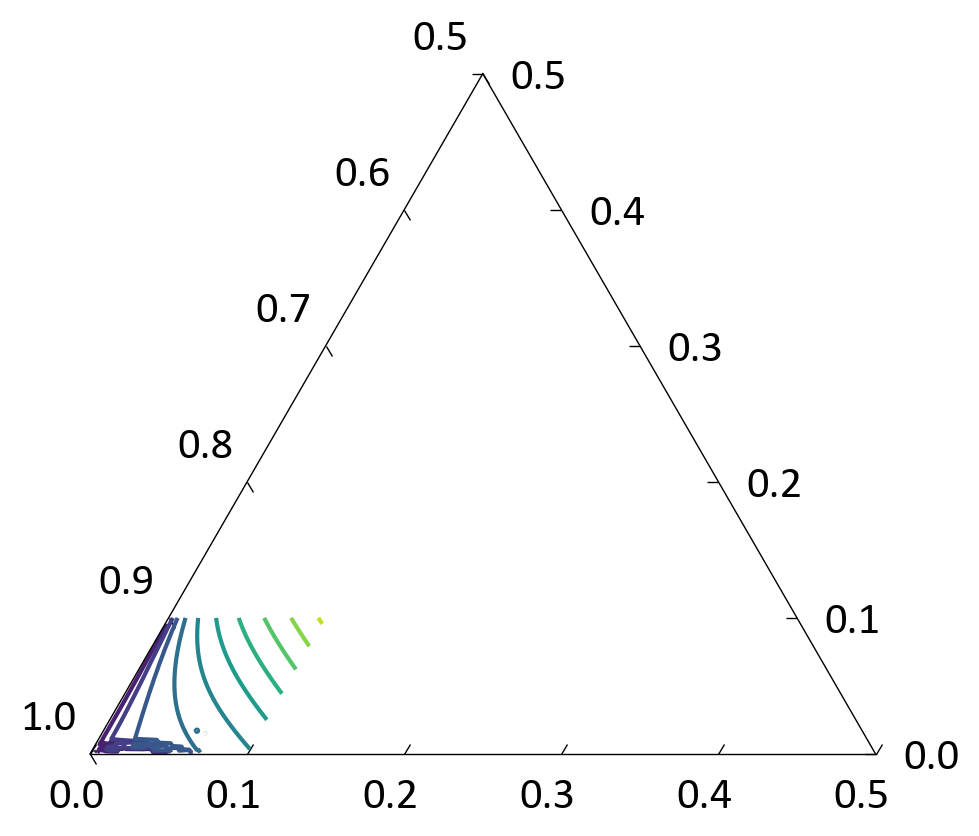

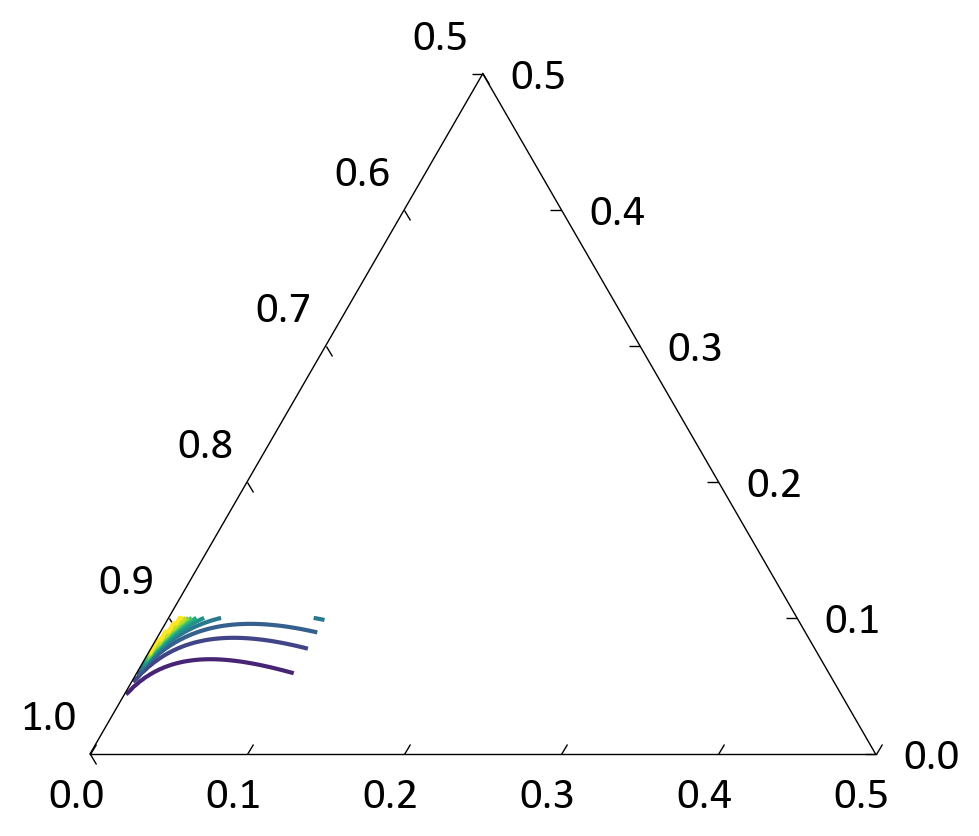

In [9]:
T=303.15
p=1E5
npoint=50
DL=0.00
kswp = 0.4279 #/ 0.03166**2
v0p = 0.7937/1000
v0p = 0.7478/1000
polymer=np.asarray([False,False,False,True])
mobile=np.asarray([True,True,False,False])
ksw=np.asarray([0.2121,0.00001])
# ksw=np.asarray([0.244,0.00001])
ww=np.linspace(0.001,0.1,npoint)
we=np.linspace(0.001,0.1,npoint)
RHvec=[]
wwvec=[]
wevec=[]
wASDvec=[]
RHsaftvec=[]
for i,vali in enumerate(ww):
    for i,valj in enumerate(we):
        wASD=(1-vali-valj)
        vpures=vpure(p,T,mi,si,ui,eAi,kAi,NAi)
        wi=np.asarray([vali,valj,wASD*DL,wASD*(1-DL)])
        RS=NETVLE(T,wi,v0p,mobile,polymer,ksw,mi,si,ui,eAi,kAi,NAi,vpures,Mi,kij,kijA,n=1)
        RHsaft=RS#np.exp(lngi(T,wi,mi,si,ui,eAi,kAi,NAi,vpures,Mi,kij,kijA)+np.log(wi))[mobile]
        RHsaftvec.append(RHsaft)
        RHvec.append(RS)
        wwvec.append(vali)
        wevec.append(valj)
        wASDvec.append(wASD)
    
RHvec=np.fmin(np.fmax(np.asarray(RHvec),0),1)
RHsaftvec=np.fmin(np.fmax(np.asarray(RHsaftvec),0),1)
wwvec=np.asarray(wwvec)
wevec=np.asarray(wevec)
wASDvec=np.asarray(wASDvec)

figt1,axt1=origin_like.ternary()
figt2,axt2=origin_like.ternary()

cs1=axt1.tricontour(wevec,wASDvec,wwvec,  RHvec[:,0],levels=10,posx=-20)
cs2=axt2.tricontour(wevec,wASDvec,wwvec,  RHvec[:,1],levels=10,posx=-20)
# axt1.clabel(cs1)
# axt1.clabel(cs2)
# cax1 = axt1.inset_axes([1.05, 0.1, 0.05, 0.9], transform=axt1.transAxes)
# cax2 = axt2.inset_axes([1.05, 0.1, 0.05, 0.9], transform=axt2.transAxes)
# colorbar1 = figt1.colorbar(cs1, cax=cax1)
# colorbar2 = figt2.colorbar(cs2, cax=cax2)
# colorbar1.set_label('RH', rotation=270, va='baseline')
# colorbar2.set_label('RS', rotation=270, va='baseline')
axt1.set_ternary_lim(
    0, 0.5,  # tmin, tmax
    0.5, 1,  # lmin, lmax
    0, 0.5,  # rmin, rmax
)
axt2.set_ternary_lim(
    0, 0.5,  # tmin, tmax
    0.5, 1,  # lmin, lmax
    0, 0.5,  # rmin, rmax
)
# rticks=np.linspace(0, 0.5, 6)
# tticks=np.linspace(1, 0.5, 6)
# lticks=np.linspace(0, 0.5, 6)
# # ticks_zero_one_less=ticks[np.logical_and(ticks!=0,ticks!=1)]
# axt.raxis.set_ticks(rticks)
# axt.taxis.set_ticks(tticks)
# axt.laxis.set_ticks(lticks)
plt.show()

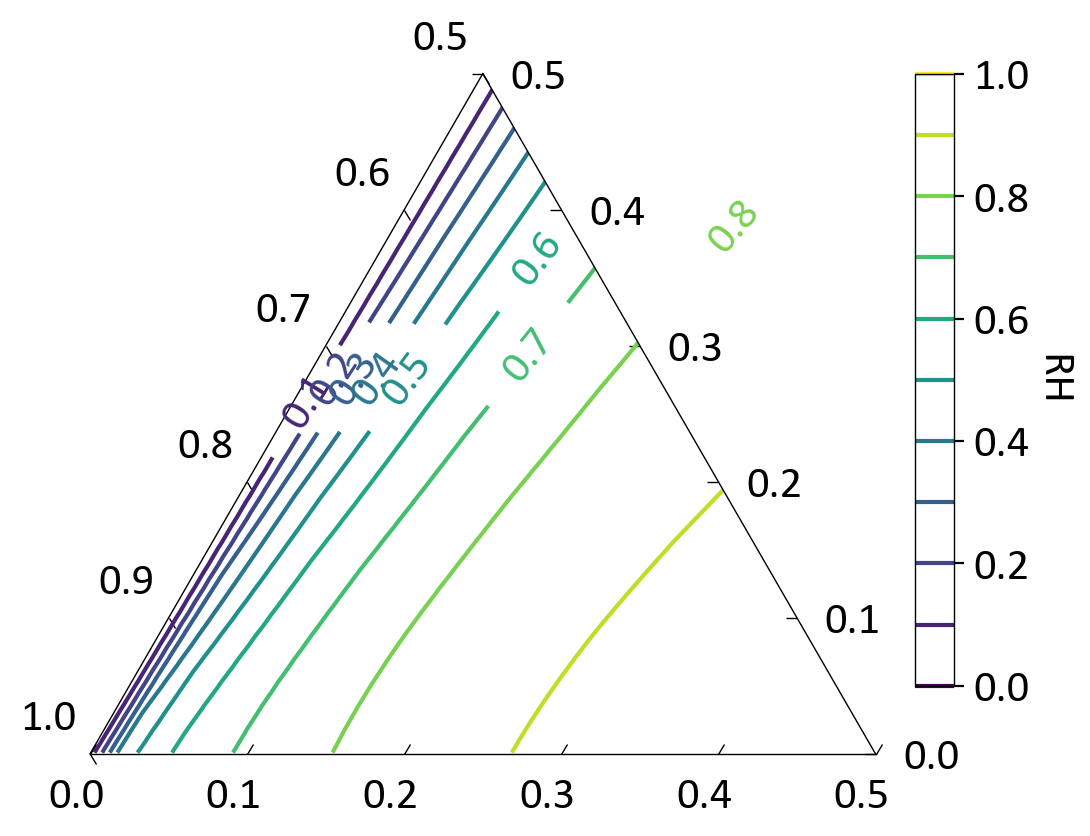

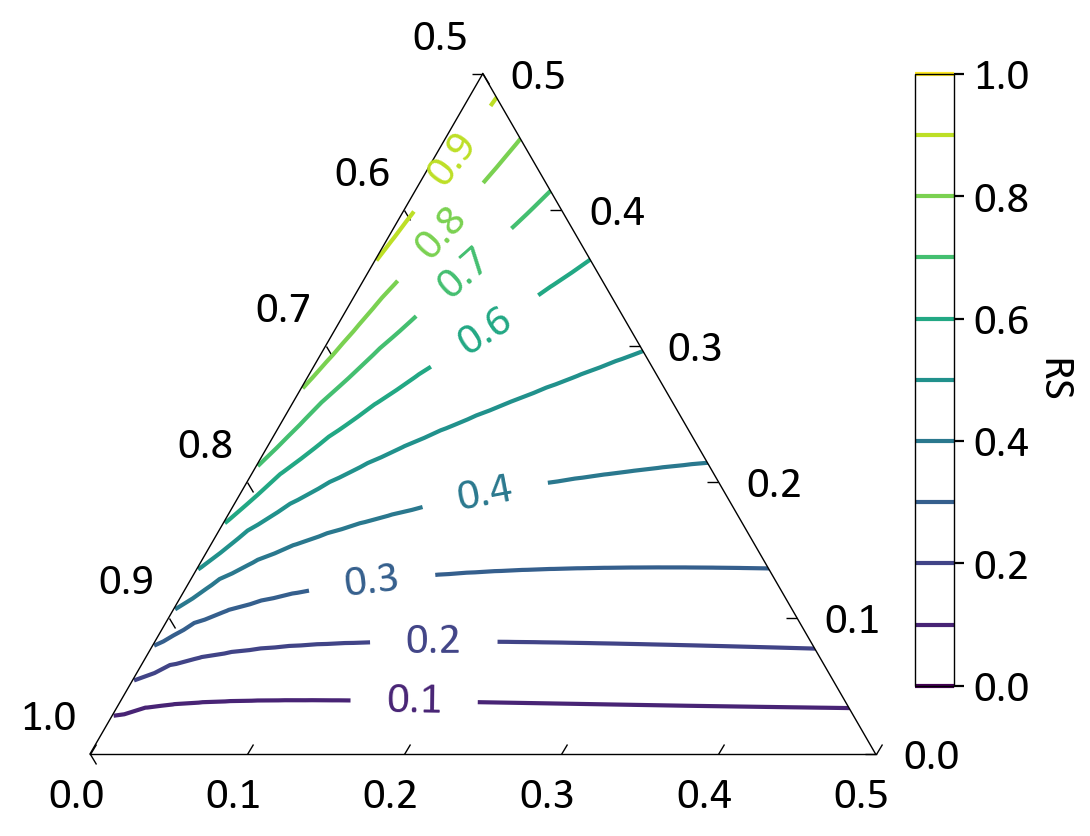

In [5]:
T=303.15
p=1E5
npoint=30
DL=0.00
kswp = 0.4279 #/ 0.03166**2
v0p = 0.7937/1000
v0p = 0.7478/1000
polymer=np.asarray([False,False,False,True])
mobile=np.asarray([True,True,False,False])
ksw=np.asarray([0.2121,0.00001])
ww=np.linspace(0.001,0.5,npoint)
we=np.linspace(0.001,0.5,npoint)
RHvec=[]
wwvec=[]
wevec=[]
wASDvec=[]
RHsaftvec=[]
for i,vali in enumerate(ww):
    for i,valj in enumerate(we):
        wASD=(1-vali-valj)
        vpures=vpure(p,T,mi,si,ui,eAi,kAi,NAi)
        wi=np.asarray([vali,valj,wASD*DL,wASD*(1-DL)])
        RS=0#NETVLE(T,wi,v0p,mobile,polymer,ksw,mi,si,ui,eAi,kAi,NAi,vpures,Mi,kij,kijA,n=1)
        RHsaft=np.exp(lngi(T,wi,mi,si,ui,eAi,kAi,NAi,vpures,Mi,kij,kijA)+np.log(wi))[mobile]
        RHsaftvec.append(RHsaft)
        RHvec.append(RS)
        wwvec.append(vali)
        wevec.append(valj)
        wASDvec.append(wASD)
    
RHvec=np.fmin(np.fmax(np.asarray(RHvec),0),1)
RHsaftvec=np.fmin(np.fmax(np.asarray(RHsaftvec),0),1)
wwvec=np.asarray(wwvec)
wevec=np.asarray(wevec)
wASDvec=np.asarray(wASDvec)

figt1,axt1=origin_like.ternary()
figt2,axt2=origin_like.ternary()

cs1=axt1.tricontour(wevec,wASDvec,wwvec,  RHsaftvec[:,0],levels=10,posx=-20)
cs2=axt2.tricontour(wevec,wASDvec,wwvec,  RHsaftvec[:,1],levels=10,posx=-20)
axt1.clabel(cs1)
axt1.clabel(cs2)
cax1 = axt1.inset_axes([1.05, 0.1, 0.05, 0.9], transform=axt1.transAxes)
cax2 = axt2.inset_axes([1.05, 0.1, 0.05, 0.9], transform=axt2.transAxes)
colorbar1 = figt1.colorbar(cs1, cax=cax1)
colorbar2 = figt2.colorbar(cs2, cax=cax2)
colorbar1.set_label('RH', rotation=270, va='baseline')
colorbar2.set_label('RS', rotation=270, va='baseline')
axt1.set_ternary_lim(
    0, 0.5,  # tmin, tmax
    0.5, 1,  # lmin, lmax
    0, 0.5,  # rmin, rmax
)
axt2.set_ternary_lim(
    0, 0.5,  # tmin, tmax
    0.5, 1,  # lmin, lmax
    0, 0.5,  # rmin, rmax
)
# rticks=np.linspace(0, 0.5, 6)
# tticks=np.linspace(1, 0.5, 6)
# lticks=np.linspace(0, 0.5, 6)
# # ticks_zero_one_less=ticks[np.logical_and(ticks!=0,ticks!=1)]
# axt.raxis.set_ticks(rticks)
# axt.taxis.set_ticks(tticks)
# axt.laxis.set_ticks(lticks)
plt.show()